In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as mpt
%matplotlib inline

In [2]:
covid = pd.read_csv("/content/drive/MyDrive/raw_data.csv")
data = pd.read_csv("/content/drive/MyDrive/transformed_data.csv")

In [3]:
covid.shape

(50418, 14)

In [4]:
covid.head(3)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

**Data Cleaning**

In [6]:
covid.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)

In [8]:
pd.isnull(covid).sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

In [9]:
covid.dropna(inplace = True)

In [10]:
covid.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,3.151800e+04,31518.000000,31518.000000,3.151800e+04,31518.000000,31518.000000
mean,8.808503e+04,3377.478711,63.011566,5.382026e+07,20379.787699,0.718076
std,4.440274e+05,14210.580108,22.393402,1.778576e+08,20564.848782,0.167130
min,0.000000e+00,0.000000,0.000000,2.873710e+05,661.240000,0.000000
25%,1.007000e+03,17.000000,48.150000,4.937796e+06,5034.708000,0.592000
50%,5.394000e+03,106.000000,67.590000,1.140253e+07,13913.839000,0.752000
75%,3.750775e+04,770.750000,80.560000,3.892834e+07,29524.265000,0.853000
max,7.762544e+06,214771.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [11]:
covid['total_deaths'] = covid['total_deaths'].astype('int')
covid['total_cases'] = covid['total_cases'].astype('int')

In [12]:
covid.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0,0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0,0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0,0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0,0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0,0,0.0,38928341,1803.987,0.498


In [14]:
data.shape

(50418, 9)

In [15]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [16]:
data["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [17]:
data["COUNTRY"].value_counts().mode()

0    294
Name: COUNTRY, dtype: int64

In [18]:
# Aggregating the data

code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((covid.loc[covid["location"] == i, "total_cases"]).sum())
    td.append((covid.loc[covid["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((covid.loc[covid["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)),
                               columns = ["Country Code", "Country", "HDI",
                                          "Total Cases", "Total Deaths",
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000      4568497        145187   
1          ALB      Albania  0.600765       853811         25118   
2          DZA      Algeria  0.754000      4517337        193596   
3          AND      Andorra  0.659551            0             0   
4          AGO       Angola  0.418952       231726          9387   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


In [19]:
# Sorting Data According to Total Cases

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400    690145015      24954453   
90           IND          India  0.64000    363376766       6571675   
27           BRA         Brazil  0.75900    292459528      10380285   
157          RUS         Russia  0.81600    123399590       1967275   
150          PER           Peru  0.59949     74882128       3020038   

     Stringency Index  Population  
200          3.350949   19.617637  
90           3.610552   21.045353  
27           3.136028   19.174732  
157          3.380088   18.798668  
150          3.430126   17.311165  


In [21]:
# Top 10 Countries with Highest Covid Cases

data = data.head(10)
print(data)

    Country Code        Country       HDI  Total Cases  Total Deaths  \
200          USA  United States  0.924000    690145015      24954453   
90           IND          India  0.640000    363376766       6571675   
27           BRA         Brazil  0.759000    292459528      10380285   
157          RUS         Russia  0.816000    123399590       1967275   
150          PER           Peru  0.599490     74882128       3020038   
178          ESP          Spain  0.887969     68181646       5309129   
125          MEX         Mexico  0.774000     65107719       6365485   
175          ZAF   South Africa  0.608653     63024717       1357682   
42           COL       Colombia  0.581847     59583492       1907164   
92           IRN           Iran  0.798000     52421884       2914070   

     Stringency Index  Population  
200          3.350949   19.617637  
90           3.610552   21.045353  
27           3.136028   19.174732  
157          3.380088   18.798668  
150          3.430126   17.

In [22]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75,
                            11497.65, 7027.61, 9946.03,
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71,
                            10126.72, 6126.87, 8346.70,
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code        Country       HDI  Total Cases  Total Deaths  \
200          USA  United States  0.924000    690145015      24954453   
90           IND          India  0.640000    363376766       6571675   
27           BRA         Brazil  0.759000    292459528      10380285   
157          RUS         Russia  0.816000    123399590       1967275   
150          PER           Peru  0.599490     74882128       3020038   
178          ESP          Spain  0.887969     68181646       5309129   
125          MEX         Mexico  0.774000     65107719       6365485   
175          ZAF   South Africa  0.608653     63024717       1357682   
42           COL       Colombia  0.581847     59583492       1907164   
92           IRN           Iran  0.798000     52421884       2914070   

     Stringency Index  Population  GDP Before Covid  GDP During Covid  
200          3.350949   19.617637          65279.53          63543.58  
90           3.610552   21.045353           8897.49           6

<ipython-input-22-74acbc922c46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75,
<ipython-input-22-74acbc922c46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["GDP During Covid"] = [63543.58, 6796.84, 1900.71,


**Data Visualization**

Countries with highest Covid cases

In [24]:
df = pd.DataFrame(data, columns = ['Country', 'Total Cases'])
df.head(3)

,Country,Total Cases
200,United States,690145015
90,India,363376766
27,Brazil,292459528


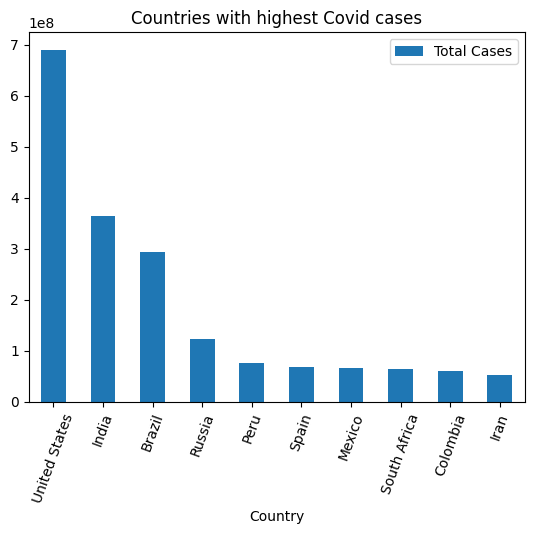

In [25]:
df.plot.bar(x="Country", y="Total Cases", rot=70, title="Countries with highest Covid cases");

Countries with highest Deaths

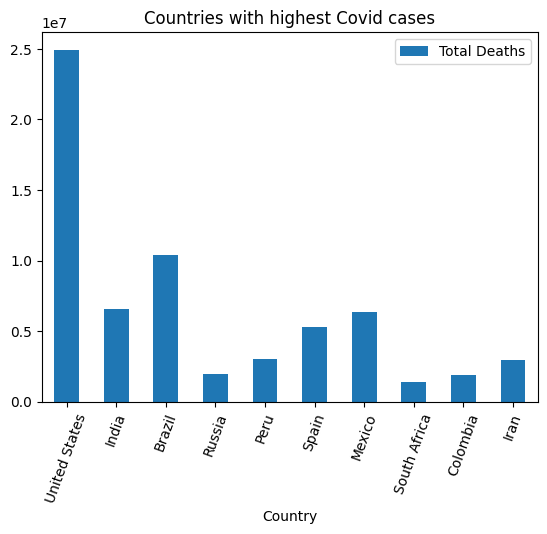

In [27]:
df1 = pd.DataFrame(data, columns = ['Country', 'Total Deaths'])
df1.plot.bar(x="Country", y="Total Deaths", rot=70, title="Countries with highest Covid cases");

Countries with highest Covid cases and Deaths

In [28]:
df3 = pd.merge(df, df1, on='Country')
df3.head()

,Country,Total Cases,Total Deaths
0,United States,690145015,24954453
1,India,363376766,6571675
2,Brazil,292459528,10380285
3,Russia,123399590,1967275
4,Peru,74882128,3020038


<Axes: xlabel='Country'>

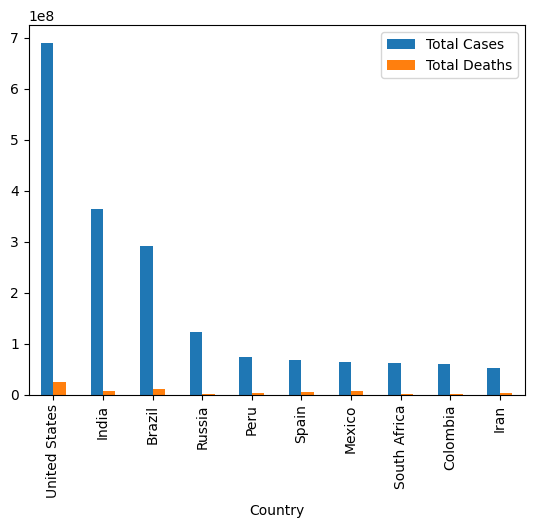

In [33]:
df3.plot(x="Country", y=["Total Cases", "Total Deaths"], kind="bar")

Percentage of Total cases and Deaths

In [37]:
# Percentage of Total Cases and Deaths
cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]

fig = px.pie(data, values=values, names=labels,
             title='Percentage of Total Cases and Deaths', hole=0.5)
fig.show()

In [38]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.4949729107473453


Stringency Index during Covid-19

In [39]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='Stringency Index', height=400,
             title= "Stringency Index during Covid-19")
fig.show()

**Analyzing Covid-19 Impacts on Economy**

GDP per capita Before Covid-19

In [40]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='GDP Before Covid', height=400,
             title="GDP Per Capita Before Covid-19")
fig.show()

GDP per capita During Covid-19

In [41]:
fig = px.bar(data, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths'],
             color='GDP During Covid', height=400,
             title="GDP Per Capita During Covid-19")
fig.show()